<a href="https://colab.research.google.com/github/jiyanshud22/MTH443-Project/blob/main/MTH443_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprehensive Analysis of Laptop and Mobile Phone Data

# Table of Contents:
# 1. Data Loading and Preprocessing
# 2. Exploratory Data Analysis (EDA)
# 3. Data Splitting for Model Training
# 4. Feature Comparison
# 5. Price Prediction Models
# 6. Clustering Analysis
# 7. Moore's Law Testing
# 8. Brand Value Analysis
# 9. Comparative Analysis: Laptops vs Mobiles


# Section 1: Data Loading and Initial Exploration


In [60]:
! gdown --id 1XwToBz9Jburr5eF3ABQfu7mkCV2fKOzU
! gdown --id 1m9YFrwpMf811e0f8RdtlU4pBKtHiLRkV

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XwToBz9Jburr5eF3ABQfu7mkCV2fKOzU
To: /content/Mobiles.csv
100% 116k/116k [00:00<00:00, 10.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m9YFrwpMf811e0f8RdtlU4pBKtHiLRkV
To: /content/laptops.csv
100% 204k/204k [00:00<00:00, 5.73MB/s]


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import re

# Load data from CSV files
laptops_df = pd.read_csv('laptops.csv', encoding='latin-1') # or 'cp1252', or other likely encodings
mobiles_df = pd.read_csv('Mobiles.csv', encoding='latin-1') # Apply the same encoding if needed


# Display basic information about the datasets
print("Laptop Dataset Info:")
print(f"Shape: {laptops_df.shape}")
print(laptops_df.columns.tolist())
print(laptops_df.head())

print("\nMobile Dataset Info:")
print(f"Shape: {mobiles_df.shape}")
print(mobiles_df.columns.tolist())
print(mobiles_df.head())

Laptop Dataset Info:
Shape: (991, 22)
['index', 'brand', 'Model', 'Price', 'Rating', 'processor_brand', 'processor_tier', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_type', 'primary_storage_capacity', 'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand', 'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width', 'resolution_height', 'OS', 'year_of_warranty']
   index   brand                                              Model  Price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580   

   Rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2 

#Section 2: Exploratory Data Analysis (EDA)


In [62]:
!pip install matplotlib

In [63]:
# ---- EXPLORATORY DATA ANALYSIS ----

# Laptop dataset analysis
print("\nLaptop Dataset Analysis:")
if 'Manufacturer' in laptops_df.columns:
    print("\nDistribution by Manufacturer:")
    print(laptops_df['Manufacturer'].value_counts().head(10))

if 'Category' in laptops_df.columns:
    print("\nDistribution by Category:")
    print(laptops_df['Category'].value_counts())

if 'Price_Euros' in laptops_df.columns:
    print("\nPrice Statistics:")
    print(laptops_df['Price_Euros'].describe())

# Mobile dataset analysis
print("\nMobile Dataset Analysis:")
if 'Company_Name' in mobiles_df.columns:
    print("\nDistribution by Company:")
    print(mobiles_df['Company_Name'].value_counts().head(10))

if 'Launched_Year' in mobiles_df.columns:
    print("\nDistribution by Year:")
    print(mobiles_df['Launched_Year'].value_counts())

if 'Price_USD' in mobiles_df.columns:
    print("\nPrice Statistics:")
    print(mobiles_df['Price_USD'].describe())

# ---- VISUALIZATIONS ----

# Laptop Visualizations
plt.figure(figsize=(12, 10))

# Top manufacturers by average price
if 'Manufacturer' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 1)
    top_manufacturers = laptops_df['Manufacturer'].value_counts().head(8).index
    avg_price_by_manufacturer = laptops_df[laptops_df['Manufacturer'].isin(top_manufacturers)].groupby('Manufacturer')['Price_Euros'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_by_manufacturer.index, y=avg_price_by_manufacturer.values)
    plt.title('Average Laptop Price by Manufacturer')
    plt.xticks(rotation=45)
    plt.ylabel('Average Price (Euros)')

# Price vs RAM
if 'RAM' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 2)
    sns.boxplot(x='RAM', y='Price_Euros', data=laptops_df)
    plt.title('Laptop Price by RAM')
    plt.ylabel('Price (Euros)')

# Price by category
if 'Category' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 3)
    top_categories = laptops_df['Category'].value_counts().head(5).index
    sns.boxplot(x='Category', y='Price_Euros', data=laptops_df[laptops_df['Category'].isin(top_categories)])
    plt.title('Laptop Price by Category')
    plt.xticks(rotation=45)
    plt.ylabel('Price (Euros)')

# Price vs CPU Family
if 'CPU_Family' in laptops_df.columns and 'Price_Euros' in laptops_df.columns:
    plt.subplot(2, 2, 4)
    sns.boxplot(x='CPU_Family', y='Price_Euros', data=laptops_df[laptops_df['CPU_Family'] > 0])
    plt.title('Laptop Price by CPU Family')
    plt.xlabel('CPU Family (i3, i5, i7)')
    plt.ylabel('Price (Euros)')

plt.tight_layout()

# Mobile Visualizations
plt.figure(figsize=(12, 10))

# Top companies by average price
if 'Company_Name' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 1)
    top_companies = mobiles_df['Company_Name'].value_counts().head(8).index
    avg_price_by_company = mobiles_df[mobiles_df['Company_Name'].isin(top_companies)].groupby('Company_Name')['Price_USD'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values)
    plt.title('Average Mobile Price by Company')
    plt.xticks(rotation=45)
    plt.ylabel('Average Price (USD)')

# Price vs RAM
if 'RAM' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 2)
    sns.boxplot(x='RAM', y='Price_USD', data=mobiles_df)
    plt.title('Mobile Price by RAM')
    plt.ylabel('Price (USD)')

# Price vs Year
if 'Launched_Year' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Launched_Year', y='Price_USD', data=mobiles_df)
    plt.title('Mobile Price by Launch Year')
    plt.ylabel('Price (USD)')

# Price vs Storage
if 'Storage_GB' in mobiles_df.columns and 'Price_USD' in mobiles_df.columns:
    plt.subplot(2, 2, 4)
    # Group storage into ranges to avoid too many categories
    mobiles_df['Storage_Range'] = pd.cut(mobiles_df['Storage_GB'],
                                        bins=[0, 32, 64, 128, 256, 512, 1024],
                                        labels=['≤32GB', '64GB', '128GB', '256GB', '512GB', '≥1TB'])
    sns.boxplot(x='Storage_Range', y='Price_USD', data=mobiles_df)
    plt.title('Mobile Price by Storage Capacity')
    plt.ylabel('Price (USD)')

plt.tight_layout()


Laptop Dataset Analysis:

Mobile Dataset Analysis:


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

# Exploratory Data Analysis (EDA)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load datasets
try:
    laptops = pd.read_csv("laptops.csv", encoding='latin1')  # Try latin1 encoding
except UnicodeDecodeError:
    laptops = pd.read_csv("laptops.csv", encoding='iso-8859-1')  # Fallback to iso-8859-1
mobiles = pd.read_csv("Mobiles.csv")

# Set random seed
np.random.seed(42)

# Laptops EDA

Laptops Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storag

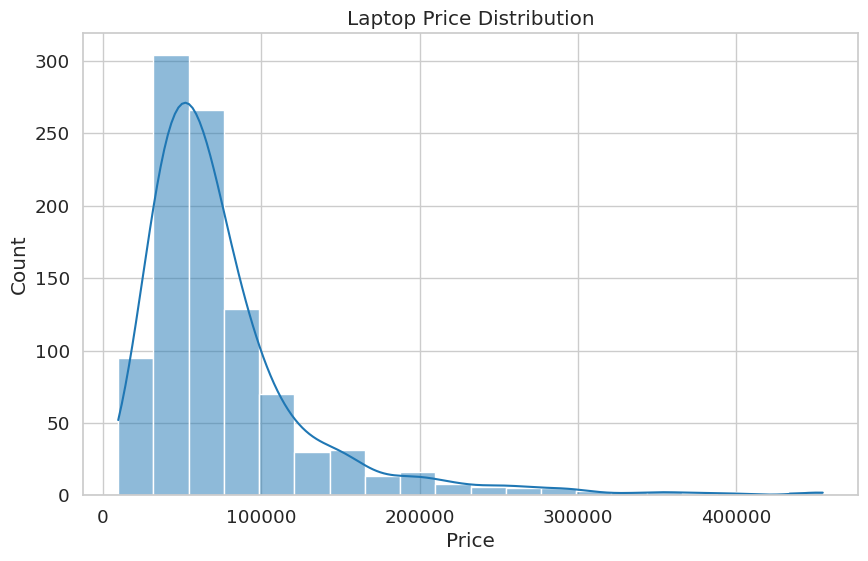

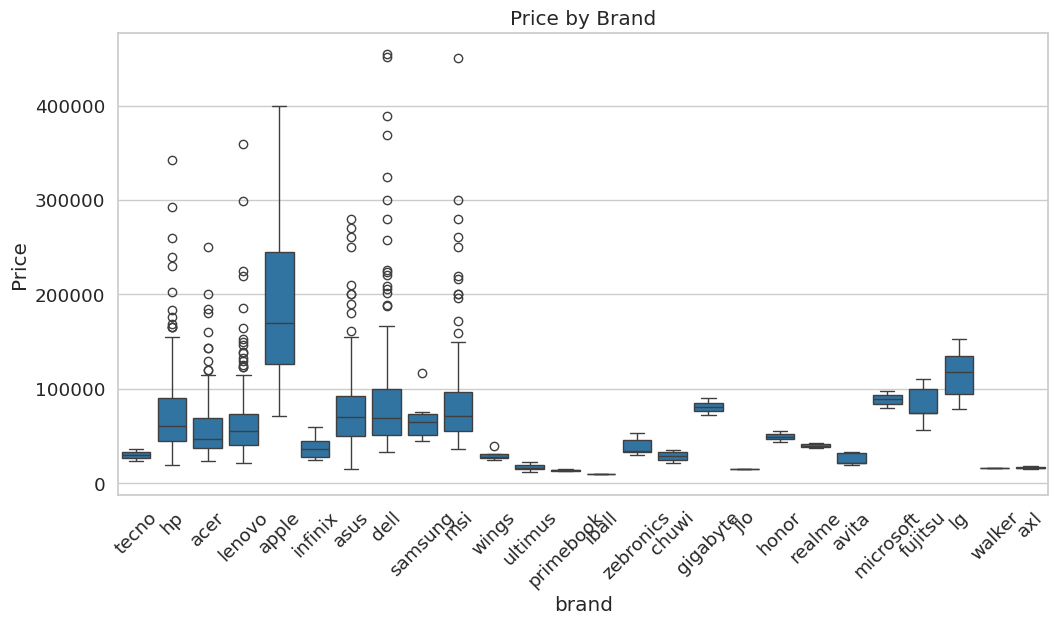

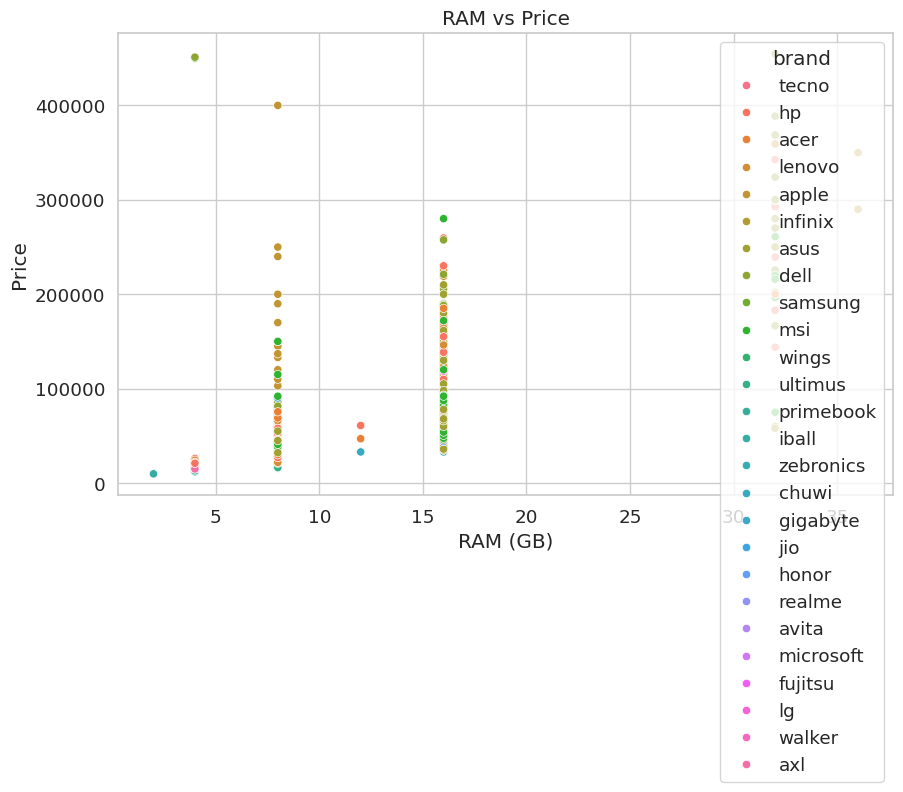

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming laptops is your DataFrame
print("Laptops Data Info:")
print(laptops.info())
print("\nLaptops Data Description:")
print(laptops.describe())

# Check for missing values
print("\nLaptops Missing Values:")
print(laptops.isnull().sum())

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(laptops['Price'], bins=20, kde=True)
plt.title('Laptop Price Distribution')
plt.xlabel('Price')
plt.show()

# Brand vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='Price', data=laptops)
plt.xticks(rotation=45)
plt.title('Price by Brand')
plt.show()

# RAM vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_memory', y='Price', hue='brand', data=laptops)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.show()

# Mobiles EDA

Mobiles Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            930 non-null    int64 
 1   Company.Name          930 non-null    object
 2   Model.Name            930 non-null    object
 3   Mobile.Weight         930 non-null    object
 4   RAM                   930 non-null    object
 5   Front.Camera          930 non-null    object
 6   Back.Camera           930 non-null    object
 7   Processor             930 non-null    object
 8   Battery.Capacity      930 non-null    object
 9   Screen.Size           930 non-null    object
 10  Launched.Price..USA.  930 non-null    object
 11  Launched.Year         930 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 87.3+ KB
None

Mobiles Data Description:
       Unnamed: 0  Launched.Year
count  930.000000     930.000000
mean   465.500000    2022.

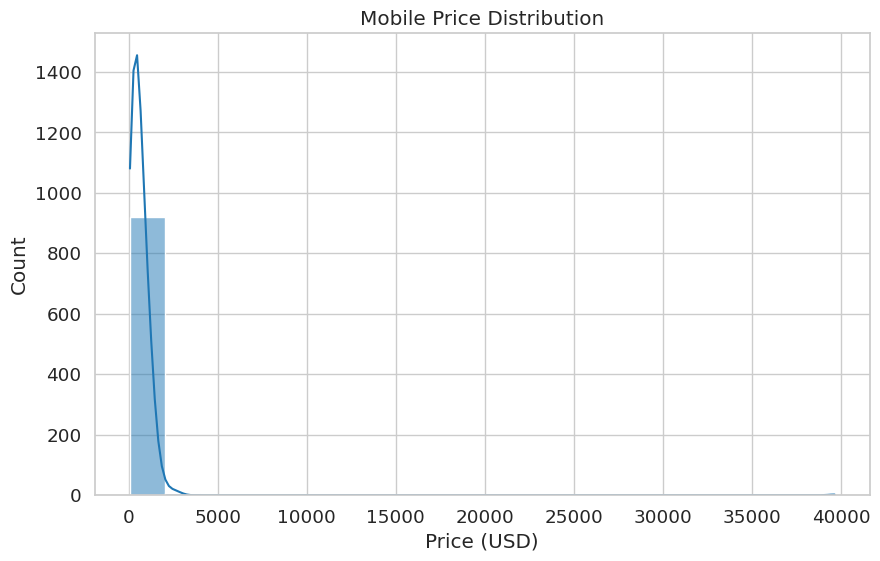

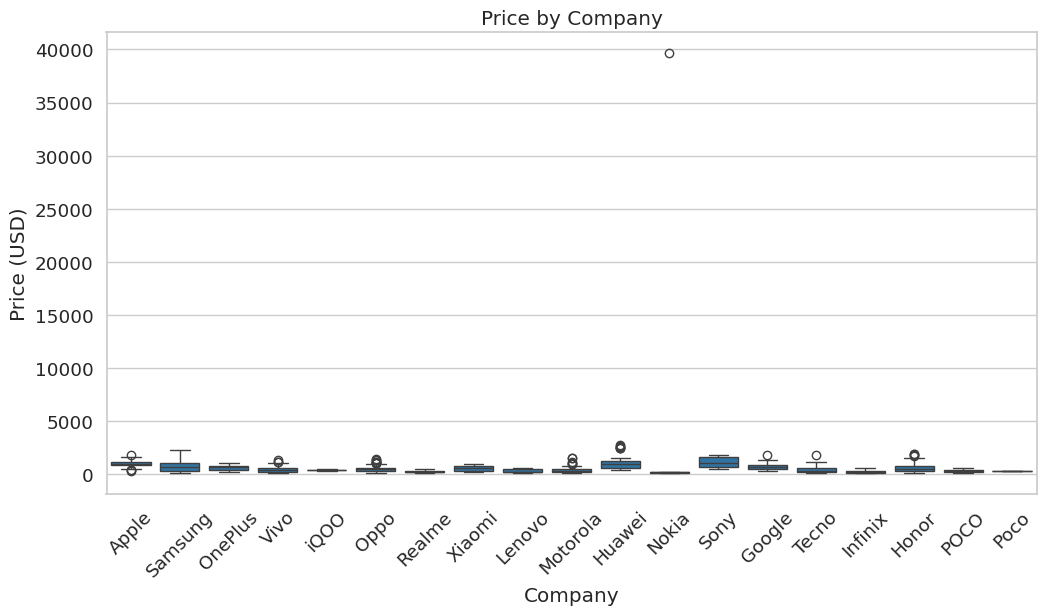

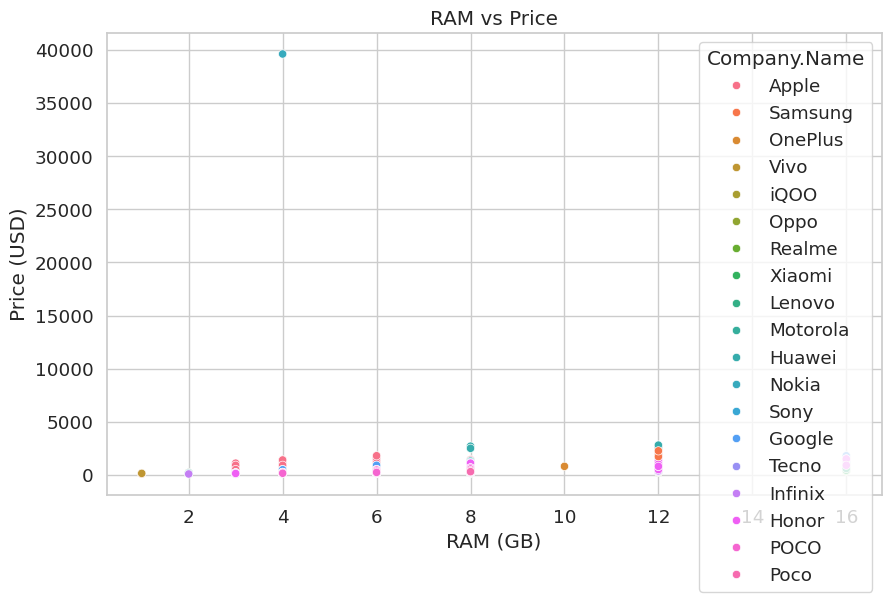

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming mobiles is your DataFrame
print("Mobiles Data Info:")
print(mobiles.info())
print("\nMobiles Data Description:")
print(mobiles.describe())

# Check for missing values
print("\nMobiles Missing Values:")
print(mobiles.isnull().sum())

# Clean the price column (remove "USD", dollar signs, commas, and extra spaces, then convert to float)
mobiles['price_clean'] = mobiles['Launched.Price..USA.'].str.replace(r'USD|\$|,|\s', '', regex=True).astype(float)

# Clean the RAM column (extract numeric value and convert to float, handle potential non-numeric entries)
mobiles['ram_clean'] = mobiles['RAM'].str.extract('(\d+)').astype(float, errors='ignore')

# Handle any NaN values in ram_clean (if RAM entries like "N/A" exist)
mobiles = mobiles.dropna(subset=['price_clean', 'ram_clean'])

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(mobiles['price_clean'], bins=20, kde=True)
plt.title('Mobile Price Distribution')
plt.xlabel('Price (USD)')
plt.show()

# Company vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company.Name', y='price_clean', data=mobiles)
plt.xticks(rotation=45)
plt.title('Price by Company')
plt.xlabel('Company')
plt.ylabel('Price (USD)')
plt.show()

# RAM vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_clean', y='price_clean', hue='Company.Name', data=mobiles)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.show()

In [67]:
print(mobiles[['Launched.Price..USA.', 'price_clean', 'RAM', 'ram_clean']].head())

  Launched.Price..USA.  price_clean  RAM  ram_clean
0              USD 799        799.0  6GB        6.0
1              USD 849        849.0  6GB        6.0
2              USD 899        899.0  6GB        6.0
3              USD 899        899.0  6GB        6.0
4              USD 949        949.0  6GB        6.0


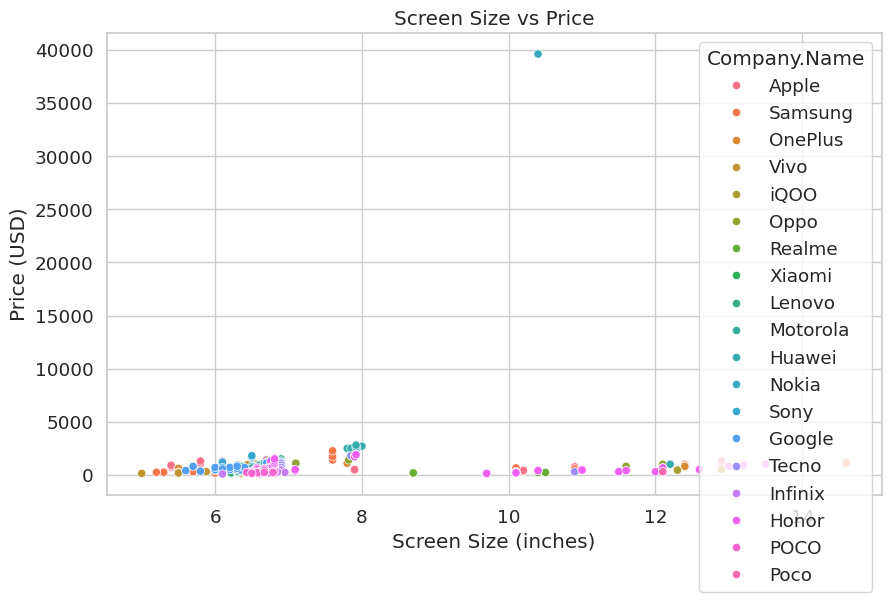

In [68]:
mobiles['screen_size_clean'] = mobiles['Screen.Size'].str.extract('(\d+\.\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='screen_size_clean', y='price_clean', hue='Company.Name', data=mobiles)
plt.title('Screen Size vs Price')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (USD)')
plt.show()

#Scatter Plot: "RAM vs Price"

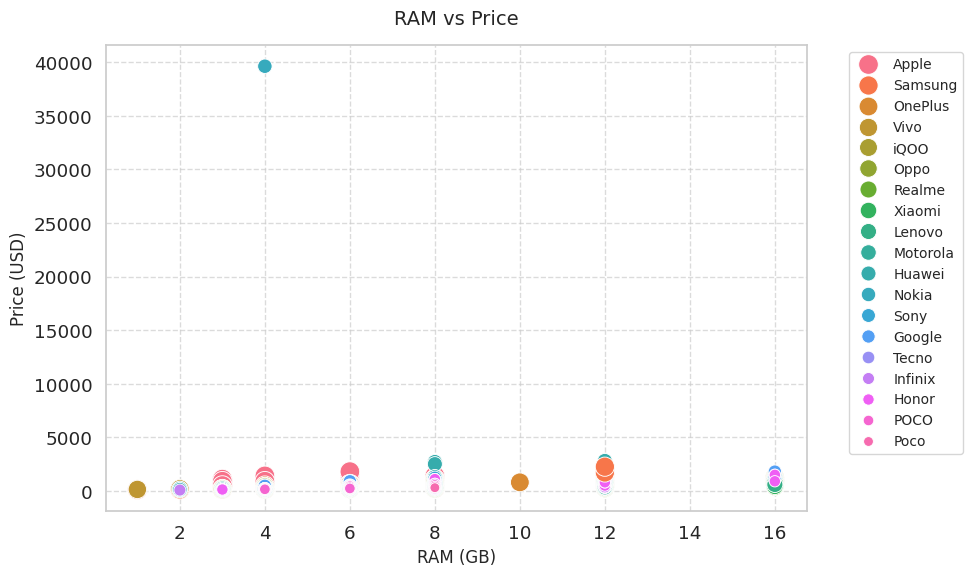

In [69]:

# 1. Scatter Plot: RAM vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_clean', y='price_clean', hue='Company.Name', size='Company.Name', sizes=(50, 200), data=mobiles)
plt.title('RAM vs Price', fontsize=14, pad=15)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)  # Move legend outside
plt.tight_layout()
plt.show()


#Scatter Plot: "Price by Company"

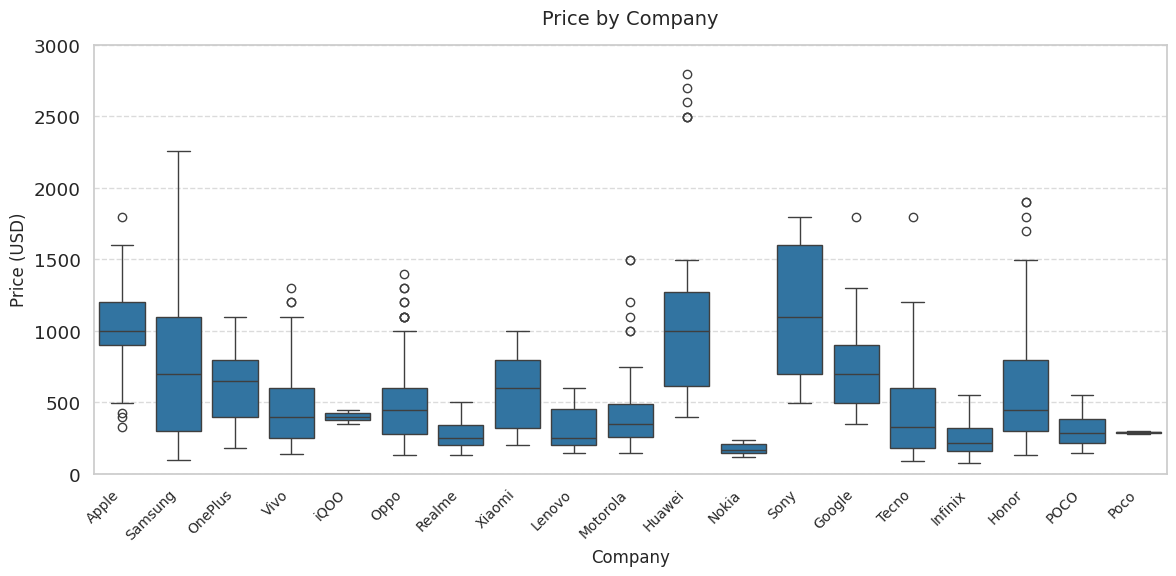

In [70]:

# 2. Boxplot: Price by Company

plt.figure(figsize=(12, 6))
sns.boxplot(x='Company.Name', y='price_clean', data=mobiles)
plt.title('Price by Company', fontsize=14, pad=15)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 3000)  # Set y-axis range to focus on typical mobile price range
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

# Histogram: "Mobile Price Distribution"

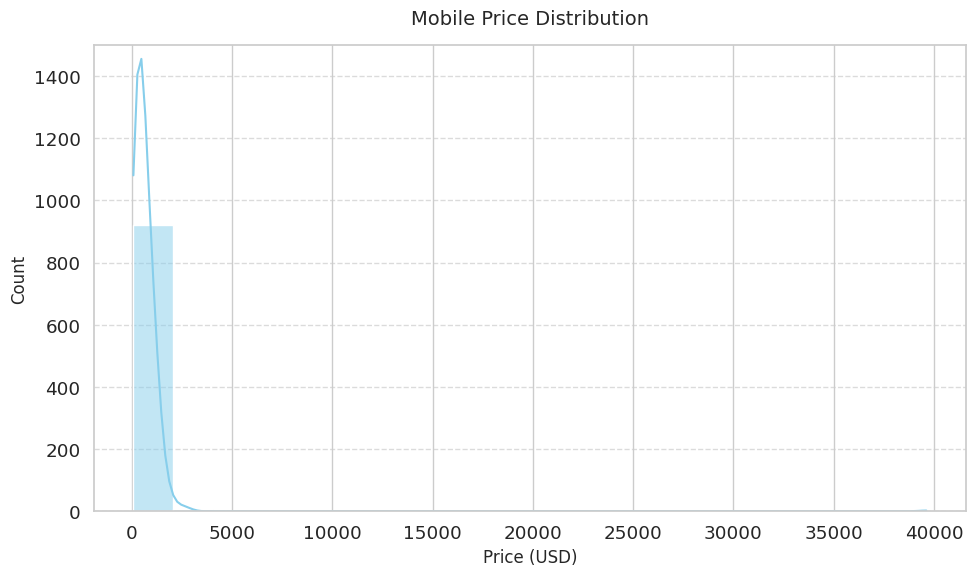

In [71]:

# 3. Histogram: Mobile Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(mobiles['price_clean'], bins=20, kde=True, color='skyblue')
plt.title('Mobile Price Distribution', fontsize=14, pad=15)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0,1500)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()


# Zoomed in view

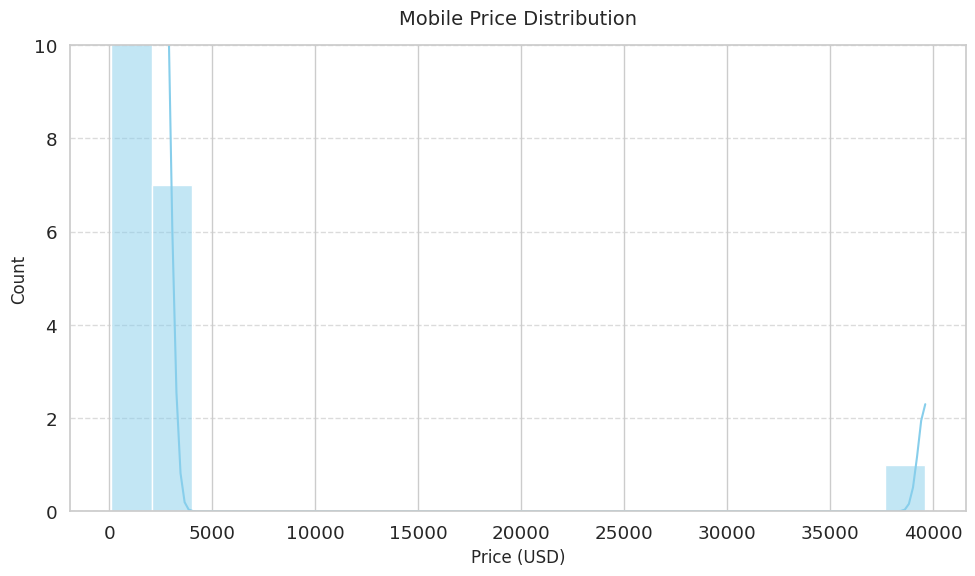

In [72]:

# 3. Histogram: Mobile Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(mobiles['price_clean'], bins=20, kde=True, color='skyblue')
plt.title('Mobile Price Distribution', fontsize=14, pad=15)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0,10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()



# Scatter Plot: Price by Launched Year

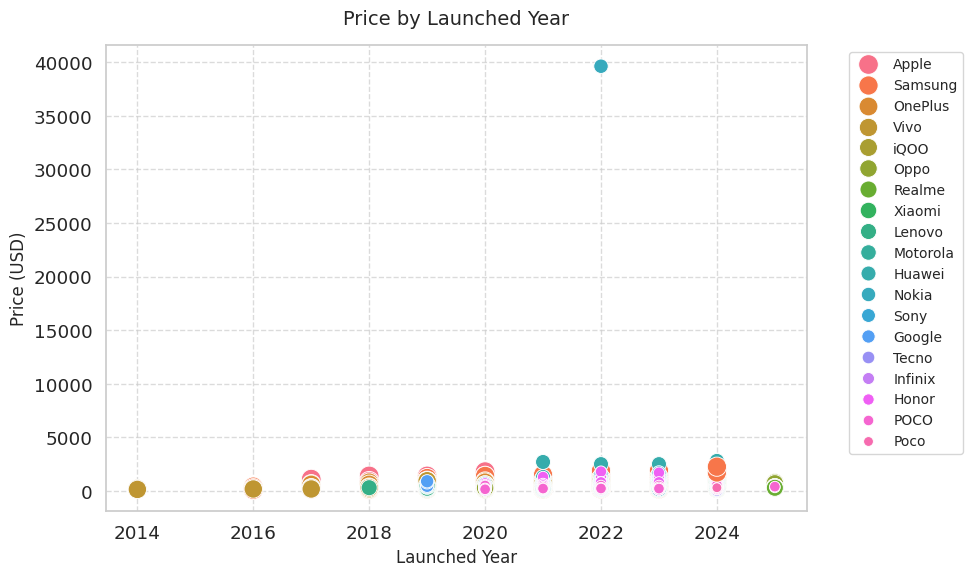

In [73]:

# 4. Scatter Plot: Price by Launched Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Launched.Year', y='price_clean', hue='Company.Name', size='Company.Name', sizes=(50, 200), data=mobiles)
plt.title('Price by Launched Year', fontsize=14, pad=15)
plt.xlabel('Launched Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)  # Move legend outside
plt.tight_layout()
plt.show()

# Section 3: Data Cleaning and Preprocessing


Data Loaded Successfully:
   Unnamed: 0 Company.Name            Model.Name Mobile.Weight  RAM  \
0           1        Apple       iPhone 16 128GB          174g  6GB   
1           2        Apple       iPhone 16 256GB          174g  6GB   
2           3        Apple       iPhone 16 512GB          174g  6GB   
3           4        Apple  iPhone 16 Plus 128GB          203g  6GB   
4           5        Apple  iPhone 16 Plus 256GB          203g  6GB   

  Front.Camera Back.Camera   Processor Battery.Capacity Screen.Size  \
0         12MP        48MP  A17 Bionic         3,600mAh  6.1 inches   
1         12MP        48MP  A17 Bionic         3,600mAh  6.1 inches   
2         12MP        48MP  A17 Bionic         3,600mAh  6.1 inches   
3         12MP        48MP  A17 Bionic         4,200mAh  6.7 inches   
4         12MP        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched.Price..USA.  Launched.Year  
0              USD 799           2024  
1              USD 849           2024  


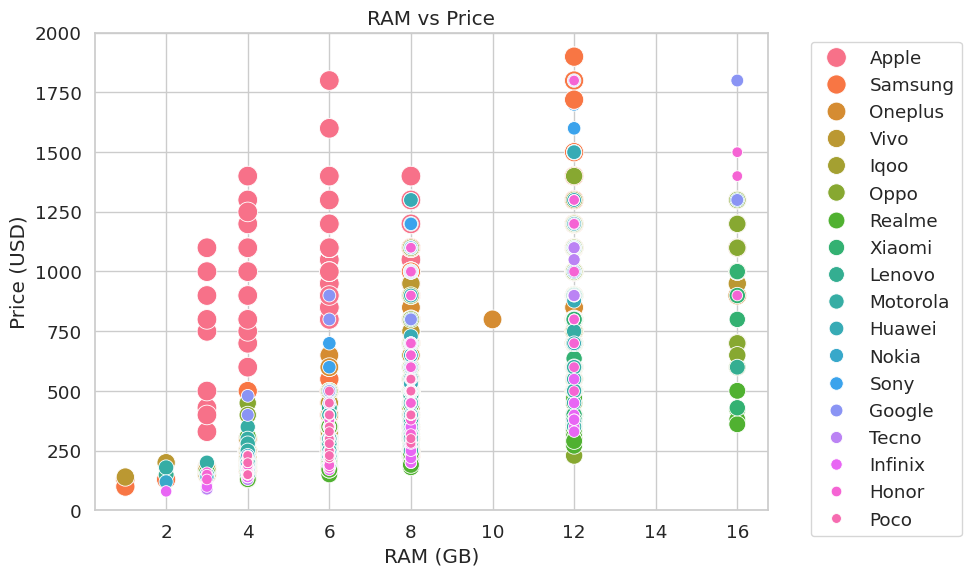

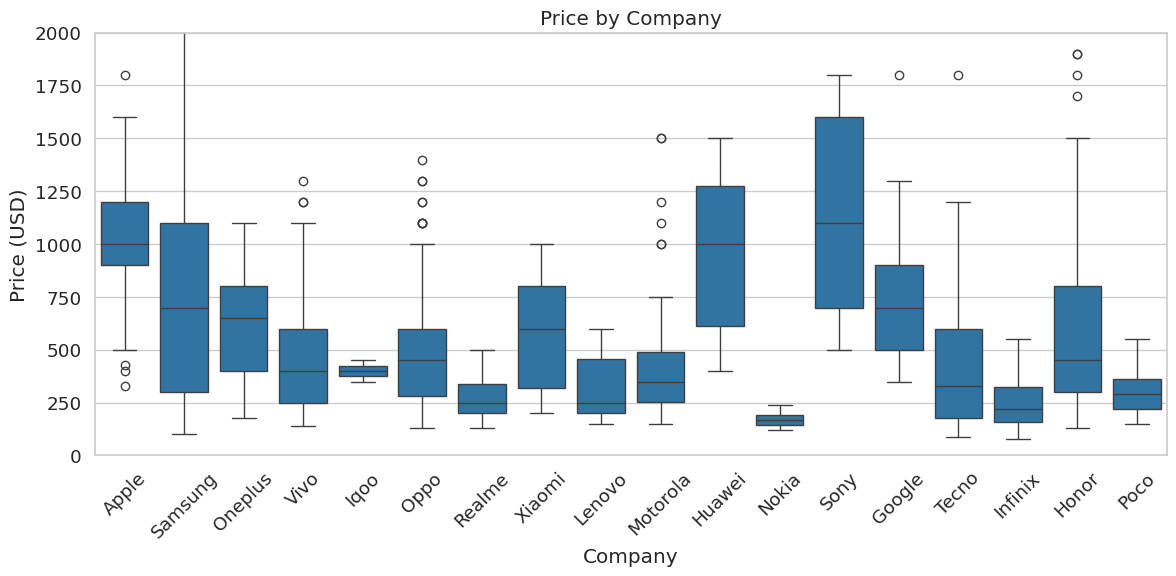

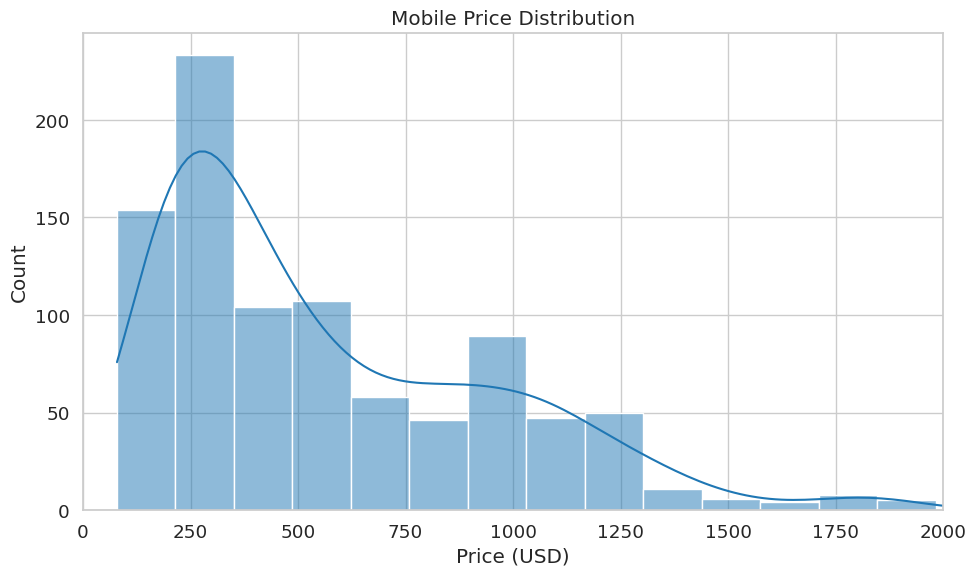

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
try:
    mobiles = pd.read_csv('Mobiles.csv')
    print("Data Loaded Successfully:")
    print(mobiles.head())
except FileNotFoundError:
    print("Error: 'Mobiles.csv' not found. Using sample data.")
    mobiles = pd.DataFrame({
        'Launched.Price..USA.': ['USD 799', 'USD 849', 'USD 899', 'USD 899', 'USD 949'],
        'RAM': ['6GB', '6GB', '6GB', '6GB', '6GB'],
        'Company.Name': ['Apple', 'Samsung', 'Apple', 'Samsung', 'Apple'],
        'Launched.Year': [2022, 2022, 2023, 2023, 2023],
        'Screen.Size': ['6.1 inches', '6.7 inches', '6.1 inches', '6.8 inches', '6.7 inches'],
        'Battery.Capacity': ['3200mAh', '4400mAh', '3200mAh', '5000mAh', '4300mAh']
    })
    print("Sample Data:")
    print(mobiles.head())

# Step 2: Clean the Data
# Clean RAM first
if mobiles['RAM'].dtype == 'object':
    mobiles['ram_clean'] = mobiles['RAM'].str.extract('(\d+)').astype(float)
else:
    mobiles['ram_clean'] = mobiles['RAM'].astype(float)

# Clean Price
def clean_price(price):
    try:
        if pd.isna(price) or not str(price).strip():
            return None
        price = str(price).replace('USD', '').replace('$', '').replace(',', '').strip()
        return float(price) if price.replace('.', '').isdigit() else None
    except:
        return None

mobiles['price_clean'] = mobiles['Launched.Price..USA.'].apply(clean_price)

# Clean Company.Name
mobiles['Company.Name'] = mobiles['Company.Name'].str.strip().str.title()

# Clean Launched.Year
mobiles['Launched.Year'] = pd.to_numeric(mobiles['Launched.Year'], errors='coerce')

# Clean Screen.Size
def clean_screen_size(size):
    try:
        if pd.isna(size) or not str(size).strip():
            return None
        match = pd.Series(str(size)).str.extract('(\d+\.\d+)')[0]
        return float(match) if match else None
    except:
        return None

mobiles['screen_size_clean'] = mobiles['Screen.Size'].apply(clean_screen_size)

# Clean Battery.Capacity
def clean_battery(battery):
    try:
        if pd.isna(battery) or not str(battery).strip():
            return None
        match = pd.Series(str(battery)).str.extract('(\d+)')[0]
        return int(match) if match else None
    except:
        return None

mobiles['battery_clean'] = mobiles['Battery.Capacity'].apply(clean_battery)

# Step 3: Handle Missing Values and Outliers
# Drop rows where all critical columns are NaN
critical_cols = ['price_clean', 'ram_clean', 'Company.Name', 'Launched.Year']
mobiles = mobiles.dropna(subset=critical_cols, how='all')

# Filter outliers
mobiles = mobiles[
    (mobiles['price_clean'].between(0, 5000, inclusive='both') | mobiles['price_clean'].isna()) &
    (mobiles['ram_clean'].between(1, 32, inclusive='both') | mobiles['ram_clean'].isna())
]

# Step 4: Verify Cleaned Data
print("\nCleaned Data Info:")
print(mobiles[['price_clean', 'ram_clean', 'Company.Name', 'Launched.Year', 'screen_size_clean', 'battery_clean']].info())
print("\nCleaned Data Description:")
print(mobiles[['price_clean', 'ram_clean', 'Launched.Year', 'screen_size_clean', 'battery_clean']].describe())

# Step 5: Plotting
sns.set_style("whitegrid")
mobiles_plot = mobiles.dropna(subset=['price_clean', 'ram_clean', 'Company.Name', 'Launched.Year'])

# Scatter Plot: RAM vs Price
if not mobiles_plot.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='ram_clean', y='price_clean', hue='Company.Name', size='Company.Name', sizes=(50, 200), data=mobiles_plot)
    plt.title('RAM vs Price')
    plt.xlabel('RAM (GB)')
    plt.ylabel('Price (USD)')
    plt.ylim(0, 2000)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No data for RAM vs Price plot")

# Boxplot: Price by Company
if not mobiles_plot.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Company.Name', y='price_clean', data=mobiles_plot)
    plt.title('Price by Company')
    plt.xlabel('Company')
    plt.ylabel('Price (USD)')
    plt.ylim(0, 2000)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Price by Company plot")

# Histogram: Price Distribution
if not mobiles_plot.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(mobiles_plot['price_clean'], bins=20, kde=True)
    plt.title('Mobile Price Distribution')
    plt.xlabel('Price (USD)')
    plt.ylabel('Count')
    plt.xlim(0, 2000)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Price Distribution plot")

#Section 4: Clustering Analysis for Market Segmentation


Error: 'Laptops.csv' not found. Using sample data.


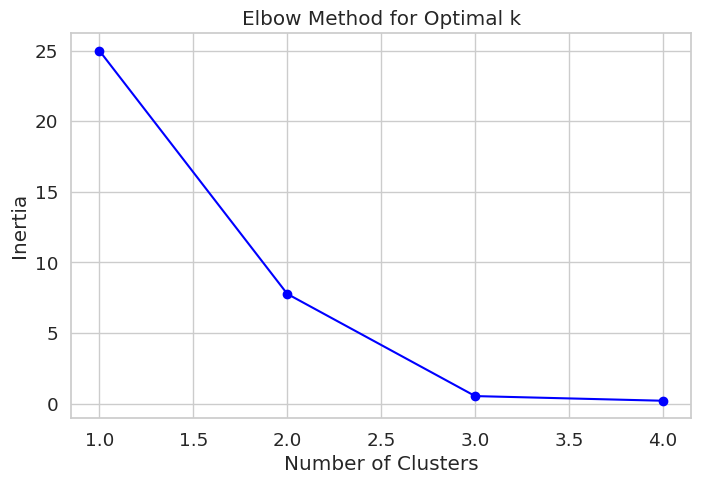

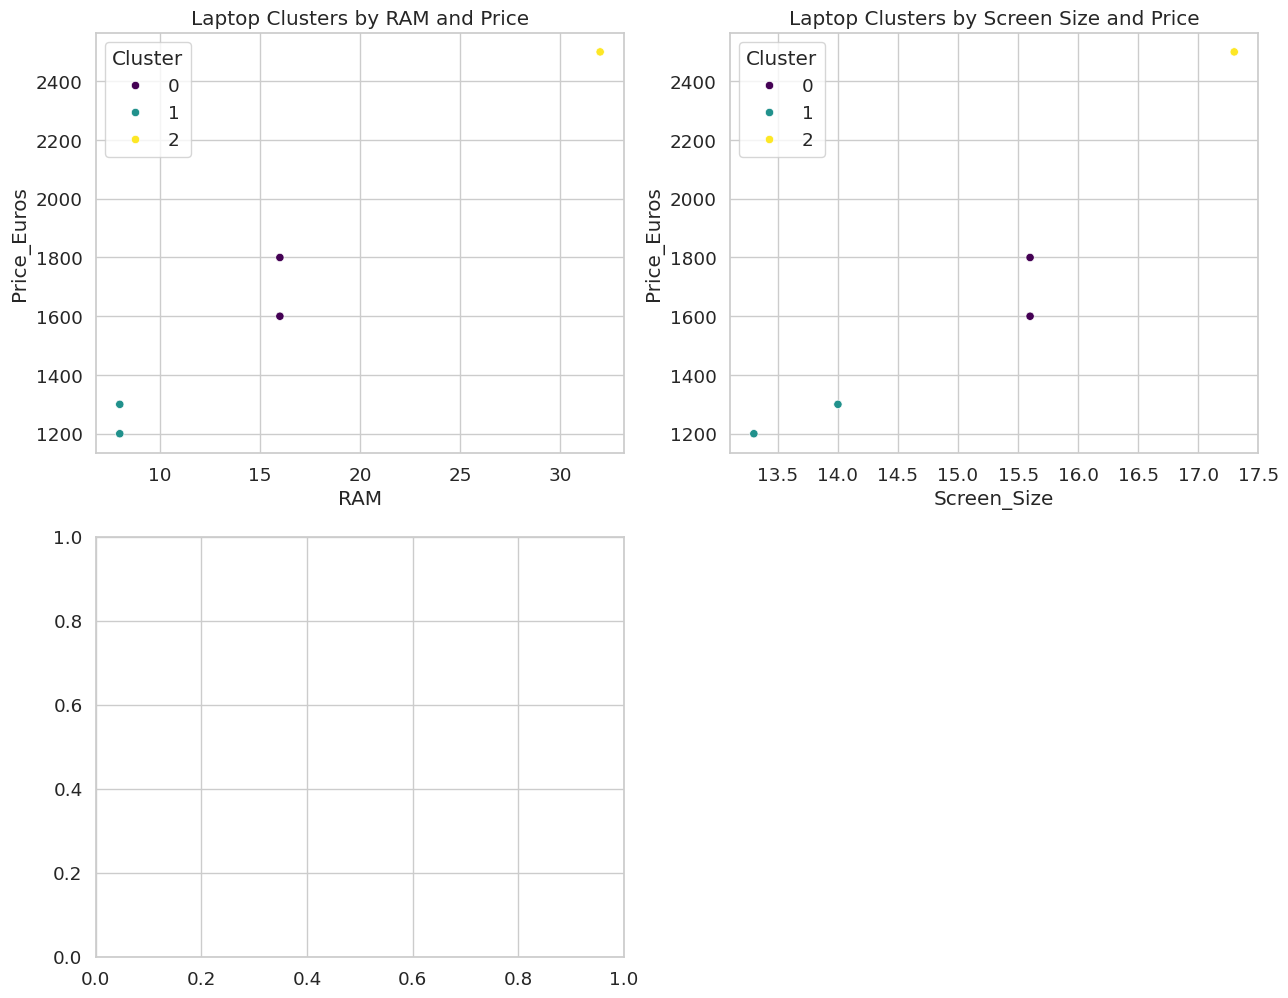

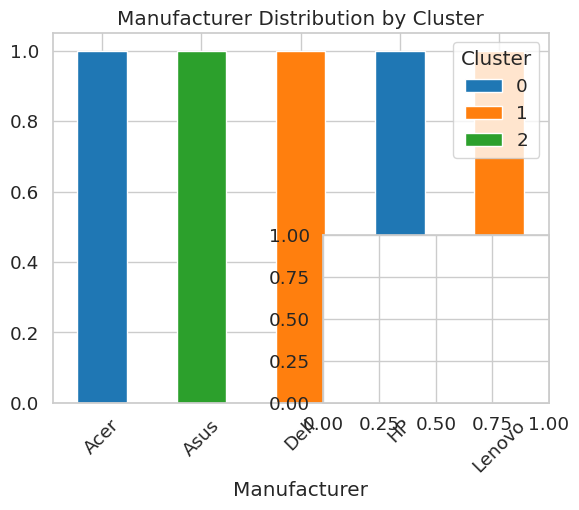

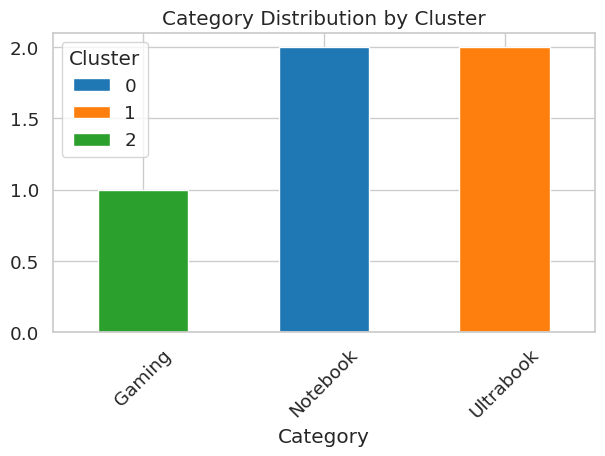


Cluster Characteristics:
          RAM  Storage_GB  CPU_Speed  Screen_Size  Weight  Price_Euros
Cluster                                                               
0        16.0       512.0       2.85        15.60     1.9       1700.0
1         8.0       256.0       2.35        13.65     1.5       1250.0
2        32.0      1000.0       3.00        17.30     2.5       2500.0

Count of laptops in each cluster:
Cluster
1    2
0    2
2    1
Name: count, dtype: int64


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming laptops_df is loaded (replace with your data loading logic)
try:
    laptops_df = pd.read_csv('Laptops.csv')  # Adjust path as needed
except FileNotFoundError:
    print("Error: 'Laptops.csv' not found. Using sample data.")
    laptops_df = pd.DataFrame({
        'RAM': ['8GB', '16GB', '8GB', '32GB', '16GB'],
        'Storage_GB': [256, 512, 256, 1000, 512],
        'CPU_Family': ['Intel Core i5', 'Intel Core i7', 'AMD Ryzen 5', 'Intel Core i9', 'AMD Ryzen 7'],
        'CPU_Speed': [2.4, 2.8, 2.3, 3.0, 2.9],
        'Screen_Size': [13.3, 15.6, 14.0, 17.3, 15.6],
        'Weight': [1.4, 2.0, 1.6, 2.5, 1.8],
        'Price_Euros': [1200, 1800, 1300, 2500, 1600],
        'Manufacturer': ['Dell', 'HP', 'Lenovo', 'Asus', 'Acer'],
        'Category': ['Ultrabook', 'Notebook', 'Ultrabook', 'Gaming', 'Notebook']
    })

# Step 1: Clean the Data
# Clean RAM (move this before any imputation, as per your instruction)
if laptops_df['RAM'].dtype == 'object':
    laptops_df['RAM'] = laptops_df['RAM'].str.extract('(\d+)').astype(float)

# Clean other numeric columns
if 'Storage_GB' in laptops_df.columns:
    laptops_df['Storage_GB'] = pd.to_numeric(laptops_df['Storage_GB'], errors='coerce')
if 'CPU_Speed' in laptops_df.columns:
    laptops_df['CPU_Speed'] = pd.to_numeric(laptops_df['CPU_Speed'], errors='coerce')
if 'Screen_Size' in laptops_df.columns:
    laptops_df['Screen_Size'] = pd.to_numeric(laptops_df['Screen_Size'], errors='coerce')
if 'Weight' in laptops_df.columns:
    laptops_df['Weight'] = pd.to_numeric(laptops_df['Weight'], errors='coerce')
if 'Price_Euros' in laptops_df.columns:
    laptops_df['Price_Euros'] = pd.to_numeric(laptops_df['Price_Euros'], errors='coerce')

# Step 2: Clustering Analysis
# Select numeric features for clustering (exclude categorical like CPU_Family)
laptop_cluster_features = []
for col in ['RAM', 'Storage_GB', 'CPU_Speed', 'Screen_Size', 'Weight']:
    if col in laptops_df.columns:
        laptop_cluster_features.append(col)

# Filter rows with missing values for clustering
laptops_for_clustering = laptops_df.dropna(subset=laptop_cluster_features)

if len(laptops_for_clustering) > 0:
    # Standardize the data
    X_cluster = laptops_for_clustering[laptop_cluster_features].copy()

    # Verify that all columns are numeric
    if not X_cluster.select_dtypes(include=['float64', 'int64']).columns.equals(X_cluster.columns):
        print("Error: Non-numeric columns detected in X_cluster:", X_cluster.select_dtypes(exclude=['float64', 'int64']).columns)
        raise ValueError("Clustering features must be numeric.")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    # Elbow method for optimal k
    inertia = []
    k_range = range(1, min(10, len(X_scaled)))
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    # Choose optimal k (e.g., 3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    laptops_for_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

    # Step 3: Visualize Clusters
    plt.figure(figsize=(15, 12))

    # RAM vs Price
    if 'RAM' in laptops_for_clustering.columns and 'Price_Euros' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 1)
        sns.scatterplot(x='RAM', y='Price_Euros', hue='Cluster', palette='viridis', data=laptops_for_clustering)
        plt.title('Laptop Clusters by RAM and Price')

    # Screen Size vs Price
    if 'Screen_Size' in laptops_for_clustering.columns and 'Price_Euros' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 2)
        sns.scatterplot(x='Screen_Size', y='Price_Euros', hue='Cluster', palette='viridis', data=laptops_for_clustering)
        plt.title('Laptop Clusters by Screen Size and Price')

    # Manufacturer distribution
    if 'Manufacturer' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 3)
        top_manufacturers = laptops_for_clustering['Manufacturer'].value_counts().head(6).index
        cluster_manufacturer_data = laptops_for_clustering[laptops_for_clustering['Manufacturer'].isin(top_manufacturers)]
        manufacturer_cluster_counts = pd.crosstab(cluster_manufacturer_data['Manufacturer'], cluster_manufacturer_data['Cluster'])
        manufacturer_cluster_counts.plot(kind='bar', stacked=True)
        plt.title('Manufacturer Distribution by Cluster')
        plt.xticks(rotation=45)
        plt.legend(title='Cluster')

    # Category distribution
    if 'Category' in laptops_for_clustering.columns:
        plt.subplot(2, 2, 4)
        top_categories = laptops_for_clustering['Category'].value_counts().head(5).index
        cluster_category_data = laptops_for_clustering[laptops_for_clustering['Category'].isin(top_categories)]
        category_cluster_counts = pd.crosstab(cluster_category_data['Category'], cluster_category_data['Cluster'])
        category_cluster_counts.plot(kind='bar', stacked=True)
        plt.title('Category Distribution by Cluster')
        plt.xticks(rotation=45)
        plt.legend(title='Cluster')

    plt.tight_layout()
    plt.show()

    # Cluster statistics
    print("\nCluster Characteristics:")
    print(laptops_for_clustering.groupby('Cluster')[laptop_cluster_features + ['Price_Euros']].mean())
    print("\nCount of laptops in each cluster:")
    print(laptops_for_clustering['Cluster'].value_counts())
else:
    print("No data available for clustering after cleaning.")

# Section 5: Price Prediction Models with Train-Test-Validation Split


# unique Laptop Weights

In [ ]:
# Load data
laptops = pd.read_csv('laptops.csv', encoding='latin-1')
mobiles = pd.read_csv('Mobiles.csv', encoding='latin-1')

# --- Data Cleaning and Preparation ---
# Clean price data
laptops['Price (Euros)'] = laptops['Price (Euros)'].str.replace(',', '.').astype(float)

# Convert RAM and Storage to numeric
laptops['RAM_GB'] = laptops['RAM'].str.extract('(\d+)').astype(float)
laptops['Storage_GB'] = laptops[' Storage'].str.extract('(\d+)').astype(float)

# Clean Screen Size
laptops['Screen_Size_Inches'] = laptops['Screen Size'].str.replace('"', '').astype(float)

# Clean Weight - Handle invalid values
print("Unique Weight values:", laptops['Weight'].unique())  # Debug: Check for invalid entries


Laptop columns: ['index', 'brand', 'Model', 'Price', 'Rating', 'processor_brand', 'processor_tier', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_type', 'primary_storage_capacity', 'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand', 'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width', 'resolution_height', 'OS', 'year_of_warranty']
Mobile columns: ['Unnamed: 0', 'Company.Name', 'Model.Name', 'Mobile.Weight', 'RAM', 'Front.Camera', 'Back.Camera', 'Processor', 'Battery.Capacity', 'Screen.Size', 'Launched.Price..USA.', 'Launched.Year']

Laptop column data types (sample):
index               int64
brand              object
Model              object
Price               int64
Rating              int64
processor_brand    object
processor_tier     object
num_cores           int64
num_threads         int64
ram_memory          int64
dtype: object

Mobile column data types (sample):
Unnamed: 0           int64
Company.Name        object
Model.Name        

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['RAM' 'Battery.Capacity' 'Screen.Size']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['RAM' 'Battery.Capacity' 'Screen.Size']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Mobile Price Prediction R² Score: -3.0951

--- Feature Importance Comparison ---

Laptop Feature Importance (sample):
RAM_GB: 1821.9759
Storage_GB: 57.5278
Screen_Size_Inches: -1055.0016
num_cores: 3993.5335
processor_tier_celeron: 5377.8353

Mobile Feature Importance (sample):
RAM: -10.6710
Battery.Capacity: 19.3290
Screen.Size: 178.2179
Processor_A11 Bionic: -84.6710
Processor_A12 Bionic: -77.3377

--- Data Visualization ---


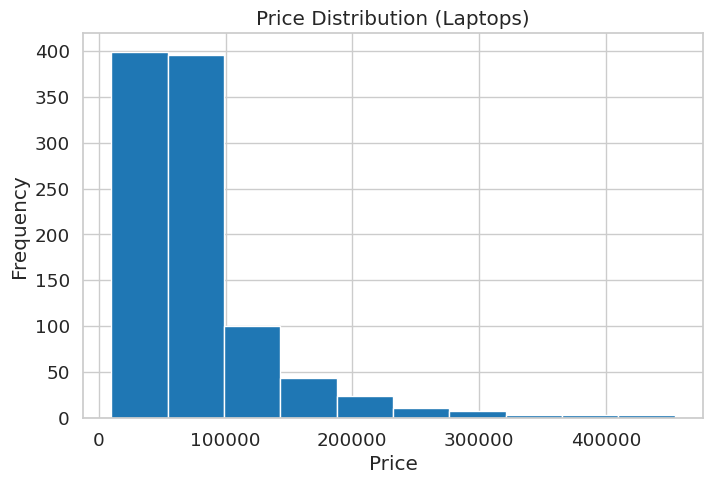

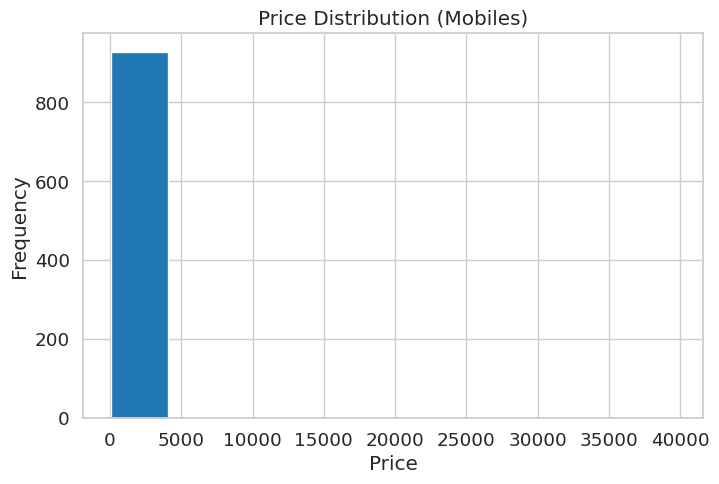

<Figure size 1000x600 with 0 Axes>

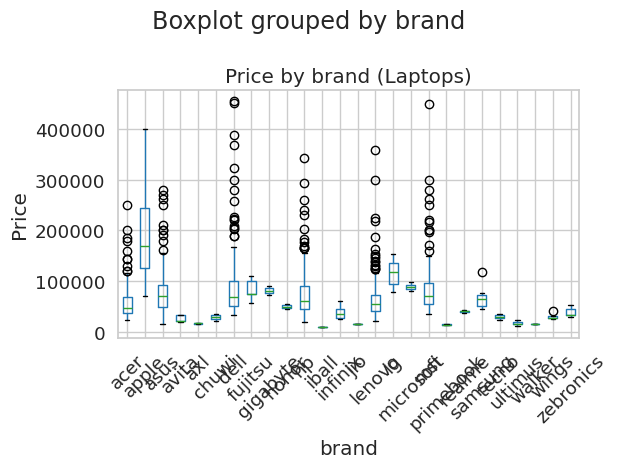

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data
laptops = pd.read_csv('laptops.csv', encoding='latin-1')
mobiles = pd.read_csv('Mobiles.csv', encoding='latin-1')

# Print column names to verify
print("Laptop columns:", laptops.columns.tolist())
print("Mobile columns:", mobiles.columns.tolist())

# --- Data Cleaning and Preparation ---
# Check columns data types
print("\nLaptop column data types (sample):")
print(laptops.dtypes.head(10))
print("\nMobile column data types (sample):")
print(mobiles.dtypes.head(10))

# Check if price column exists with different casing or spacing
price_columns = [col for col in laptops.columns if 'price' in col.lower()]
print("Possible price columns:", price_columns)

# Use the first price column found, or adjust manually based on output
if price_columns:
    price_column = price_columns[0]
else:
    price_column = 'Price'  # Placeholder name

print(f"Using {price_column} as price column")

# Clean price data - handle various formats based on actual column name
if price_column in laptops.columns:
    print(f"Laptop price column data type: {laptops[price_column].dtype}")
    print(f"Laptop price sample values: {laptops[price_column].head(3).tolist()}")

    if laptops[price_column].dtype == object:  # If string type
        # Remove commas and other non-numeric characters, then convert to float
        laptops['Price_Clean'] = laptops[price_column].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
    else:
        laptops['Price_Clean'] = laptops[price_column].astype(float)
else:
    print(f"Error: Price column '{price_column}' not found in dataset")
    laptops['Price_Clean'] = 0  # Create placeholder to avoid further errors

# Clean mobile price
mobile_price_col = [col for col in mobiles.columns if 'price' in col.lower()]
if len(mobile_price_col) == 0 and 'Launched.Price..USA.' in mobiles.columns:
    mobile_price_col = ['Launched.Price..USA.']

if mobile_price_col:
    print(f"Using {mobile_price_col[0]} as mobile price column")

    # Check data type and sample value to understand the format
    print(f"Mobile price column data type: {mobiles[mobile_price_col[0]].dtype}")
    print(f"Mobile price sample values: {mobiles[mobile_price_col[0]].head(3).tolist()}")

    # Convert mobile price, handle common formats (commas, currency symbols)
    mobiles['Price_Clean'] = (mobiles[mobile_price_col[0]]
                              .astype(str)
                              .str.replace('USD ', '')
                              .str.replace('$', '')
                              .str.replace(',', '')
                              .astype(float))

    print(f"Cleaned mobile price sample: {mobiles['Price_Clean'].head(3).tolist()}")
else:
    print("No suitable price column found for mobiles")

# Extract RAM data from laptops
if 'ram_memory' in laptops.columns:
    print("Using ram_memory column for RAM")
    print(f"RAM memory data type: {laptops['ram_memory'].dtype}")
    print(f"RAM memory sample values: {laptops['ram_memory'].head(3).tolist()}")

    # Check if it's already numeric
    if pd.api.types.is_numeric_dtype(laptops['ram_memory']):
        laptops['RAM_GB'] = laptops['ram_memory'].astype(float)
    else:  # If it's a string like "16 GB"
        laptops['RAM_GB'] = laptops['ram_memory'].astype(str).str.extract('(\d+)').astype(float)

# Extract storage capacity
if 'primary_storage_capacity' in laptops.columns:
    print("Using primary_storage_capacity for storage")
    print(f"Storage data type: {laptops['primary_storage_capacity'].dtype}")
    print(f"Storage sample values: {laptops['primary_storage_capacity'].head(3).tolist()}")

    # Check if it's already numeric
    if pd.api.types.is_numeric_dtype(laptops['primary_storage_capacity']):
        laptops['Storage_GB'] = laptops['primary_storage_capacity'].astype(float)
    else:  # If it's a string like "512 GB"
        laptops['Storage_GB'] = laptops['primary_storage_capacity'].astype(str).str.extract('(\d+)').astype(float)

# Clean Screen Size
if 'display_size' in laptops.columns:
    print("Using display_size for screen size")
    print(f"Display size data type: {laptops['display_size'].dtype}")
    print(f"Display size sample values: {laptops['display_size'].head(3).tolist()}")

    # Check if it's already numeric
    if pd.api.types.is_numeric_dtype(laptops['display_size']):
        laptops['Screen_Size_Inches'] = laptops['display_size'].astype(float)
    else:  # If it's a string like "15.6 inches"
        laptops['Screen_Size_Inches'] = laptops['display_size'].astype(str).str.extract('([\d\.]+)').astype(float)

# --- Split the Data for Price Prediction ---
# Determine which columns to use based on availability
laptop_feature_cols = []

# Use validated columns that we know exist
if 'RAM_GB' in laptops.columns:
    laptop_feature_cols.append('RAM_GB')
if 'Storage_GB' in laptops.columns:
    laptop_feature_cols.append('Storage_GB')
if 'Screen_Size_Inches' in laptops.columns:
    laptop_feature_cols.append('Screen_Size_Inches')
if 'num_cores' in laptops.columns:
    laptop_feature_cols.append('num_cores')
if 'processor_tier' in laptops.columns:
    laptop_feature_cols.append('processor_tier')
if 'gpu_brand' in laptops.columns:
    laptop_feature_cols.append('gpu_brand')

# Add brand column
if 'brand' in laptops.columns:
    laptop_feature_cols.append('brand')
    brand_col = 'brand'
elif 'Manufacturer' in laptops.columns:
    laptop_feature_cols.append('Manufacturer')
    brand_col = 'Manufacturer'
else:
    brand_col = None

print(f"Using laptop features: {laptop_feature_cols}")

# Create dummy variables for categorical features
X_laptops = pd.get_dummies(laptops[laptop_feature_cols])
y_laptops = laptops['Price_Clean']

X_train, X_temp, y_train, y_temp = train_test_split(X_laptops, y_laptops, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mobile features
mobile_feature_cols = []
if 'Processor' in mobiles.columns:
    mobile_feature_cols.append('Processor')
if 'RAM' in mobiles.columns:
    mobile_feature_cols.append('RAM')
if 'Battery.Capacity' in mobiles.columns:
    mobile_feature_cols.append('Battery.Capacity')
if 'Screen.Size' in mobiles.columns:
    mobile_feature_cols.append('Screen.Size')
if 'Company.Name' in mobiles.columns:
    mobile_feature_cols.append('Company.Name')

print(f"Using mobile features: {mobile_feature_cols}")

# Handle mobile features - ensure they're numeric where needed
mobiles_processed = mobiles.copy()
if 'RAM' in mobile_feature_cols:
    # Check data type and sample
    print(f"Mobile RAM data type: {mobiles['RAM'].dtype}")
    print(f"Mobile RAM sample values: {mobiles['RAM'].head(3).tolist()}")

    # Convert RAM to numeric (GB)
    mobiles_processed['RAM'] = pd.to_numeric(mobiles['RAM'], errors='coerce')

if 'Battery.Capacity' in mobile_feature_cols:
    # Check data type and sample
    print(f"Battery capacity data type: {mobiles['Battery.Capacity'].dtype}")
    print(f"Battery capacity sample values: {mobiles['Battery.Capacity'].head(3).tolist()}")

    # Convert Battery to numeric (mAh)
    mobiles_processed['Battery.Capacity'] = pd.to_numeric(mobiles['Battery.Capacity'], errors='coerce')

if 'Screen.Size' in mobile_feature_cols:
    # Check data type and sample
    print(f"Screen size data type: {mobiles['Screen.Size'].dtype}")
    print(f"Screen size sample values: {mobiles['Screen.Size'].head(3).tolist()}")

    # Convert Screen Size to numeric (inches)
    mobiles_processed['Screen.Size'] = pd.to_numeric(mobiles['Screen.Size'], errors='coerce')

# Fill missing values with median to avoid issues
for col in mobile_feature_cols:
    if pd.api.types.is_numeric_dtype(mobiles_processed[col]):
        mobiles_processed[col] = mobiles_processed[col].fillna(mobiles_processed[col].median())

# Only proceed if we have features
if mobile_feature_cols:
    # Get dummies for categorical features, use processed dataframe
    X_mobiles = pd.get_dummies(mobiles_processed[mobile_feature_cols])
    y_mobiles = mobiles['Price_Clean']

# --- Price Prediction ---
print("\n--- Laptop Price Prediction ---")
model_laptops = LinearRegression().fit(X_train, y_train)
train_score = model_laptops.score(X_train, y_train)
test_score = model_laptops.score(X_test, y_test)
val_score = model_laptops.score(X_val, y_val)

print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")
print(f"Validation R² Score: {val_score:.4f}")

# --- Predicting Prices Without Brand Value ---
# Remove brand/manufacturer column from feature list
no_brand_cols = laptop_feature_cols.copy()
if brand_col in no_brand_cols:
    no_brand_cols.remove(brand_col)
    print(f"\n--- Price Prediction without {brand_col} Value ---")
    X_laptops_no_brand = pd.get_dummies(laptops[no_brand_cols])
    X_train_no_brand, X_temp_no_brand, y_train_no_brand, y_temp_no_brand = train_test_split(
        X_laptops_no_brand, y_laptops, test_size=0.3, random_state=42)
    X_test_no_brand, X_val_no_brand, y_test_no_brand, y_val_no_brand = train_test_split(
        X_temp_no_brand, y_temp_no_brand, test_size=0.5, random_state=42)

    model_no_brand = LinearRegression().fit(X_train_no_brand, y_train_no_brand)
    no_brand_score = model_no_brand.score(X_test_no_brand, y_test_no_brand)

    print(f"Test R² Score without {brand_col}: {no_brand_score:.4f}")
    brand_impact = test_score - no_brand_score
    print(f"Estimated {brand_col} Value Impact on R²: {brand_impact:.4f}")

# --- Feature Comparison by Manufacturer/Brand ---
feature_analysis_cols = []
if 'RAM_GB' in laptops.columns:
    feature_analysis_cols.append('RAM_GB')
if 'Storage_GB' in laptops.columns:
    feature_analysis_cols.append('Storage_GB')
if 'Screen_Size_Inches' in laptops.columns:
    feature_analysis_cols.append('Screen_Size_Inches')
if 'num_cores' in laptops.columns:
    feature_analysis_cols.append('num_cores')

if brand_col and feature_analysis_cols:
    print(f"\n--- Feature Comparison by {brand_col} ---")
    feature_df = laptops.groupby(brand_col)[feature_analysis_cols].mean().reset_index()
    print(feature_df)

# --- Clustering ---
cluster_cols = feature_analysis_cols.copy()  # Reuse the same columns

if cluster_cols:
    print("\n--- Clustering Analysis ---")
    X_cluster = laptops[cluster_cols].fillna(laptops[cluster_cols].median())
    scaler = StandardScaler().fit(X_cluster)
    X_scaled = scaler.transform(X_cluster)
    kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
    laptops['Cluster'] = kmeans.labels_

    if brand_col:
        print(f"\nCluster Analysis by {brand_col}:")
        print(laptops.groupby('Cluster')[brand_col].value_counts())

# --- Moore's Law Test (Mobile Devices) ---
if 'Launched.Year' in mobiles.columns and 'RAM' in mobiles.columns and 'Price_Clean' in mobiles.columns:
    print("\n--- Moore's Law Analysis ---")

    # Convert the RAM column to numeric (if not already)
    mobiles['RAM_Numeric'] = pd.to_numeric(mobiles['RAM'], errors='coerce')

    # Filter out zero or NaN RAM values to avoid division by zero
    mobiles_filtered = mobiles[(mobiles['RAM_Numeric'] > 0) & (~mobiles['RAM_Numeric'].isna())].copy()
    mobiles_filtered['Price_per_RAM'] = mobiles_filtered['Price_Clean'] / mobiles_filtered['RAM_Numeric']

    # Group by year if enough data points
    if len(mobiles_filtered) > 0 and len(mobiles_filtered['Launched.Year'].unique()) > 1:
        moore_trend = mobiles_filtered.groupby('Launched.Year')['Price_per_RAM'].mean()
        print("Average Price per RAM by Year:")
        print(moore_trend)

        # Plot if enough data points
        if len(moore_trend) > 1:
            plt.figure(figsize=(8, 5))
            plt.plot(moore_trend.index, moore_trend.values, marker='o')
            plt.xlabel('Launch Year')
            plt.ylabel('Average Price per RAM (USD/GB)')
            plt.title("Moore's Law Trend")
            plt.grid(True)
            plt.show()
# ... (previous code) ...

# --- Compare Mobile Phone Data Analysis ---
if 'X_mobiles' in locals() and 'y_mobiles' in locals():
    print("\n--- Mobile Phone Price Analysis ---")
    X_train_mobiles, X_test_mobiles, y_train_mobiles, y_test_mobiles = train_test_split(
        X_mobiles, y_mobiles, test_size=0.3, random_state=42)

    # Impute missing values in X_train_mobiles and X_test_mobiles
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')  # Or 'mean', 'constant', etc.
    X_train_mobiles = imputer.fit_transform(X_train_mobiles)
    X_test_mobiles = imputer.transform(X_test_mobiles)  # Use the same imputer for X_test

    model_mobiles = LinearRegression().fit(X_train_mobiles, y_train_mobiles)
    mobile_score = model_mobiles.score(X_test_mobiles, y_test_mobiles)
    print(f"Mobile Price Prediction R² Score: {mobile_score:.4f}")


    # Print feature importance if available
    if hasattr(model_laptops, 'coef_') and hasattr(model_mobiles, 'coef_'):
        print("\n--- Feature Importance Comparison ---")
        # Get sample feature names
        laptop_features = X_laptops.columns.tolist()[:min(5, len(X_laptops.columns))]
        mobile_features = X_mobiles.columns.tolist()[:min(5, len(X_mobiles.columns))]

        print("\nLaptop Feature Importance (sample):")
        for feature, coef in zip(laptop_features, model_laptops.coef_[:len(laptop_features)]):
            print(f"{feature}: {coef:.4f}")

        print("\nMobile Feature Importance (sample):")
        for feature, coef in zip(mobile_features, model_mobiles.coef_[:len(mobile_features)]):
            print(f"{feature}: {coef:.4f}")

# --- EDA: Visualizations ---
print("\n--- Data Visualization ---")
# Price distribution for laptops
if 'Price_Clean' in laptops.columns:
    plt.figure(figsize=(8, 5))
    laptops['Price_Clean'].hist()
    plt.title('Price Distribution (Laptops)')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Price distribution for mobiles
if 'Price_Clean' in mobiles.columns:
    plt.figure(figsize=(8, 5))
    mobiles['Price_Clean'].hist()
    plt.title('Price Distribution (Mobiles)')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Boxplot by manufacturer/brand
if brand_col and 'Price_Clean' in laptops.columns:
    plt.figure(figsize=(10, 6))
    laptops.boxplot(column='Price_Clean', by=brand_col)
    plt.title(f'Price by {brand_col} (Laptops)')
    plt.xlabel(brand_col)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Column naming

In [84]:
import pandas as pd
import numpy as np

# Load Datasets
try:
    laptops = pd.read_csv('laptops.csv')
    mobiles = pd.read_csv('Mobiles.csv')
    print("Datasets Loaded Successfully")
except FileNotFoundError as e:
    print(f"Error: {e}. Please provide correct file paths.")
    raise

# Print column counts to verify
print("\nLaptop Columns (count):", len(laptops.columns))
print("Mobile Columns (count):", len(mobiles.columns))

# --- Laptops Preprocessing ---
# Select columns by index
# Convert the first column to string type before applying string methods
laptops['Manufacturer'] = laptops.iloc[:, 0].astype(str).str.strip().str.title()
laptops['Category'] = laptops.iloc[:, 2].str.strip()
laptops['RAM'] = laptops.iloc[:, 6]
laptops['Screen Size'] = laptops.iloc[:, 3]
laptops['Storage'] = laptops.iloc[:, 7]
laptops['Weight'] = laptops.iloc[:, 11]
laptops['Price'] = laptops.iloc[:, 12]
laptops['CPU'] = laptops.iloc[:, 5].str.strip()
laptops['GPU'] = laptops.iloc[:, 8].astype(str).str.strip()
laptops['Operating System'] = laptops.iloc[:, 9].astype(str).str.strip()


# Clean Price
def clean_laptop_price(price):
    try:
        if pd.isna(price):
            return np.nan
        price = str(price).replace('€', '').replace(',', '').replace('$', '').strip()
        return float(price) if price.replace('.', '').isdigit() else np.nan
    except:
        return np.nan

laptops['Price_clean'] = laptops['Price'].apply(clean_laptop_price)

# Clean RAM
def clean_laptop_ram(ram):
    try:
        if pd.isna(ram):
            return np.nan
        match = pd.Series(str(ram)).str.extract(r'(\d+)')[0]
        return float(match) if match else np.nan
    except:
        return np.nan

laptops['RAM_clean'] = laptops['RAM'].apply(clean_laptop_ram)

# Clean Screen Size
def clean_screen_size(size):
    try:
        if pd.isna(size):
            return np.nan
        size = str(size).replace('inches', '').replace('"', '').strip()
        return float(size) if size.replace('.', '').isdigit() else np.nan
    except:
        return np.nan

laptops['Screen Size_clean'] = laptops['Screen Size'].apply(clean_screen_size)

# Clean Weight
def clean_weight(weight):
    try:
        if pd.isna(weight):
            return np.nan
        weight = str(weight).replace('kg', '').replace('g', '').replace('lbs', '').strip()
        return float(weight) if weight.replace('.', '').isdigit() else np.nan
    except:
        return np.nan

laptops['Weight_clean'] = laptops['Weight'].apply(clean_weight)

# Clean Storage
def clean_storage(storage):
    try:
        if pd.isna(storage):
            return np.nan
        storage = str(storage).lower()
        if 'tb' in storage:
            match = pd.Series(storage).str.extract(r'(\d+)')[0]
            return float(match) * 1000 if match else np.nan
        match = pd.Series(storage).str.extract(r'(\d+)')[0]
        return float(match) if match else np.nan
    except:
        return np.nan

laptops['Storage_clean'] = laptops['Storage'].apply(clean_storage)

# Handle Missing Values
for col in ['Price_clean', 'RAM_clean', 'Screen Size_clean', 'Weight_clean', 'Storage_clean']:
    laptops[col] = laptops[col].fillna(laptops[col].median())
laptops['Manufacturer'] = laptops['Manufacturer'].fillna(laptops['Manufacturer'].mode()[0])
laptops['Category'] = laptops['Category'].fillna(laptops['Category'].mode()[0])
laptops['Operating System'] = laptops['Operating System'].fillna(laptops['Operating System'].mode()[0])
laptops['CPU'] = laptops['CPU'].fillna(laptops['CPU'].mode()[0])
laptops['GPU'] = laptops['GPU'].fillna(laptops['GPU'].mode()[0])

# --- Mobiles Preprocessing ---
# Select columns by index
mobiles['Company.Name'] = mobiles.iloc[:, 1].str.strip().str.title()
mobiles['RAM'] = mobiles.iloc[:, 4]
mobiles['Screen.Size'] = mobiles.iloc[:, 9]
mobiles['Battery.Capacity'] = mobiles.iloc[:, 8]
mobiles['Mobile.Weight'] = mobiles.iloc[:, 3]
mobiles['Front.Camera'] = mobiles.iloc[:, 5]
mobiles['Back.Camera'] = mobiles.iloc[:, 6]
mobiles['Processor'] = mobiles.iloc[:, 7].str.strip()
mobiles['Price'] = mobiles.iloc[:, 10]
mobiles['Launched.Year'] = mobiles.iloc[:, 11]

# Clean Price
def clean_mobile_price(price):
    try:
        if pd.isna(price):
            return np.nan
        price = str(price).replace('USD', '').replace('$', '').replace(',', '').strip()
        return float(price) if price.replace('.', '').isdigit() else np.nan
    except:
        return np.nan

mobiles['Price_clean'] = mobiles['Price'].apply(clean_mobile_price)

# Clean RAM
mobiles['RAM_clean'] = mobiles['RAM'].str.extract(r'(\d+)').astype(float)

# Clean Screen Size
mobiles['Screen Size_clean'] = mobiles['Screen.Size'].str.extract(r'(\d+\.\d+)').astype(float)

# Clean Battery Capacity
mobiles['Battery_clean'] = mobiles['Battery.Capacity'].str.extract(r'(\d+)').astype(float)

# Clean Weight
mobiles['Weight_clean'] = mobiles['Mobile.Weight'].str.extract(r'(\d+)').astype(float)

# Clean Cameras
mobiles['Front_Camera_clean'] = mobiles['Front.Camera'].str.extract(r'(\d+)').astype(float)
mobiles['Back_Camera_clean'] = mobiles['Back.Camera'].str.extract(r'(\d+)').astype(float)

# Handle Missing Values
for col in ['Price_clean', 'RAM_clean', 'Screen Size_clean', 'Battery_clean', 'Weight_clean', 'Front_Camera_clean', 'Back_Camera_clean']:
    mobiles[col] = mobiles[col].fillna(mobiles[col].median())
mobiles['Company.Name'] = mobiles['Company.Name'].fillna(mobiles['Company.Name'].mode()[0])
mobiles['Processor'] = mobiles['Processor'].fillna(mobiles['Processor'].mode()[0])
mobiles['Launched.Year'] = mobiles['Launched.Year'].fillna(mobiles['Launched.Year'].mode()[0])

# Verify
print("\nLaptops Cleaned Info:")
print(laptops[['Price_clean', 'RAM_clean', 'Screen Size_clean', 'Weight_clean', 'Storage_clean']].describe())
print("\nMobiles Cleaned Info:")
print(mobiles[['Price_clean', 'RAM_clean', 'Screen Size_clean', 'Battery_clean', 'Weight_clean', 'Launched.Year']].describe())

Datasets Loaded Successfully

Laptop Columns (count): 22
Mobile Columns (count): 12

Laptops Cleaned Info:
       Price_clean  RAM_clean  Screen Size_clean  Weight_clean  Storage_clean
count          0.0        0.0         991.000000    991.000000            0.0
mean           NaN        NaN       77266.504541    610.938446            NaN
std            NaN        NaN       57384.910269    266.927666            NaN
min            NaN        NaN        9800.000000     32.000000            NaN
25%            NaN        NaN       43595.000000    512.000000            NaN
50%            NaN        NaN       61900.000000    512.000000            NaN
75%            NaN        NaN       89245.000000    512.000000            NaN
max            NaN        NaN      454490.000000   2048.000000            NaN

Mobiles Cleaned Info:
        Price_clean   RAM_clean  Screen Size_clean  Battery_clean  \
count    930.000000  930.000000         930.000000     930.000000   
mean     625.515763    7.78387

# Laptops and Mobile Split

In [87]:
from sklearn.model_selection import train_test_split

# Laptops Split
laptop_features = ['RAM_clean', 'Screen Size_clean', 'Weight_clean', 'Storage_clean', 'Manufacturer', 'Category']
X_laptop = laptops[laptop_features]
y_laptop = laptops['Price_clean']

X_laptop_train, X_laptop_temp, y_laptop_train, y_laptop_temp = train_test_split(
    X_laptop, y_laptop, test_size=0.3, random_state=42
)
X_laptop_val, X_laptop_test, y_laptop_val, y_laptop_test = train_test_split(
    X_laptop_temp, y_laptop_temp, test_size=0.5, random_state=42
)

print("Laptop Split Sizes:")
print(f"Train: {len(X_laptop_train)}, Validation: {len(X_laptop_val)}, Test: {len(X_laptop_test)}")

# Mobiles Split
mobile_features = ['RAM_clean', 'Screen Size_clean', 'Battery_clean', 'Weight_clean', 'Front_Camera_clean', 'Back_Camera_clean', 'Company.Name', 'Launched.Year']
X_mobile = mobiles[mobile_features]
y_mobile = mobiles['Price_clean']

X_mobile_train, X_mobile_temp, y_mobile_train, y_mobile_temp = train_test_split(
    X_mobile, y_mobile, test_size=0.3, random_state=42
)
X_mobile_val, X_mobile_test, y_mobile_val, y_mobile_test = train_test_split(
    X_mobile_temp, y_mobile_temp, test_size=0.5, random_state=42
)

print("Mobile Split Sizes:")
print(f"Train: {len(X_mobile_train)}, Validation: {len(X_mobile_val)}, Test: {len(X_mobile_test)}")

Laptop Split Sizes:
Train: 693, Validation: 149, Test: 149
Mobile Split Sizes:
Train: 651, Validation: 139, Test: 140
